In [4]:
import pandas as pd
import numpy as np

In [5]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame = False)


In [6]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
X, y = mnist.data, mnist.target

In [9]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

8


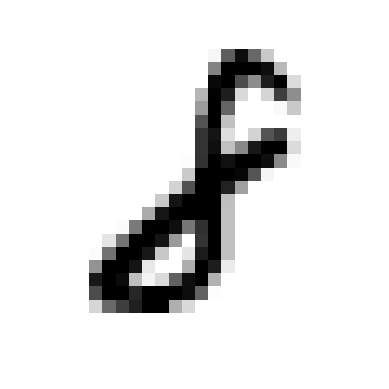

In [11]:
def digit_display(data_set, data_index):
    digit = data_set.data[data_index]
    image = digit.reshape(28, 28)
    plt.imshow(image, cmap = "binary")
    plt.axis("off")
    print(data_set.target[data_index])
# some_digit = X[31313]
# some_digit_image = some_digit.reshape(28, 28)

# plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')
# plt.axis('off')
# plt.show()
digit_display(mnist, 31313)

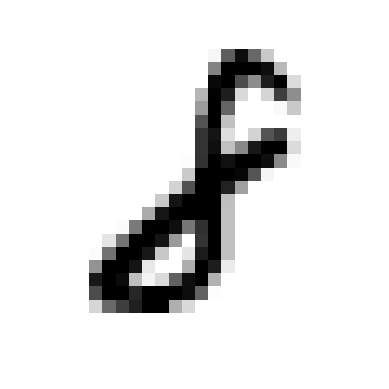

In [65]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap = "binary")
    plt.axis("off")
    
some_digit = X[31313]
plot_digit(some_digit)
plt.show()

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
shuffle_index = np.random.permutation(60000)
X_train, y_train= X[shuffle_index], y[shuffle_index]

In [14]:
# Starting with binary classifier(3 or not)

y_train_3 = (y_train == "3")
y_test_3 = (y_test == "3")

from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state = 42)
sgd_classifier.fit(X_train, y_train_3)



SGDClassifier(random_state=42)

In [15]:
[X[31313]]

[array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          8., 162., 243., 151.,  54.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 124., 254., 254., 254., 241.,
         70.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

In [16]:
sgd_classifier.predict([X[31313]])

array([False])

In [17]:
# Measuring Accuracy

from sklearn.model_selection import cross_val_score

score = cross_val_score(sgd_classifier, X_train, y_train_3, cv = 3, scoring = "accuracy")
score

array([0.9439, 0.9329, 0.9556])

In [18]:
# Base Estimato

from sklearn.base import BaseEstimator

class Never3Classifier(BaseEstimator):
    
    def fit(self, X, y = None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)
    
never_3_classifier = Never3Classifier()

cross_val_score(never_3_classifier, X_train, y_train_3, cv = 3, scoring = "accuracy")

# Gives about 90% accuracy because 10% of the dataset is 3
# So accuracy is not preferred
# Solution: Confusion Matrix



array([0.8989 , 0.89515, 0.8994 ])

In [19]:
from sklearn.model_selection import cross_val_predict

train_predictions = cross_val_predict(sgd_classifier, X_train, y_train_3, cv = 3)

# train_predictions

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_3, train_predictions)




array([[51264,  2605],
       [  747,  5384]])

In [20]:
# Confusion matrix of Never3Classifier
train_nostradamus = cross_val_predict(never_3_classifier, X_train, y_train_3, cv = 3)

confusion_matrix(y_train_3, train_nostradamus)

array([[53869,     0],
       [ 6131,     0]])

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

def display_scores(prediction):
    print("Precision :", precision_score(y_train_3, prediction))
    print("Recall :", recall_score(y_train_3, prediction))
    print("F1 :", f1_score(y_train_3, prediction))

display_scores(train_predictions)

Precision : 0.673926649142571
Recall : 0.8781601696297504
F1 : 0.7626062322946175


In [22]:
y_scores = cross_val_predict(sgd_classifier, X_train, y_train_3, cv = 3, method = "decision_function")

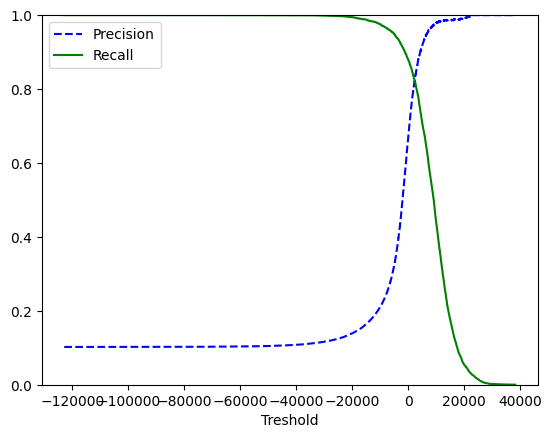

In [23]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_scores)


def plot_precision_recall_treshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
    plt.xlabel("Treshold")
    plt.legend(loc = "upper left")
    plt.ylim([0,1])
    plt.show()
    
    
plot_precision_recall_treshold(precisions, recalls, thresholds)
    

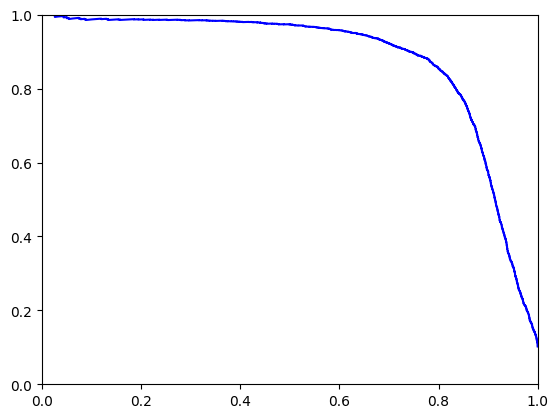

In [24]:
def plot_precision_recall(precisions, recalls):
    plt.plot(recalls[:-1], precisions[:-1], "b-")
    plt.ylim([0,1])
    plt.xlim([0,1])
    plt.show()
    
plot_precision_recall(precisions, recalls)

In [25]:
from sklearn.metrics import roc_curve

fpr, tpr, tresholds = roc_curve(y_train_3, y_scores)



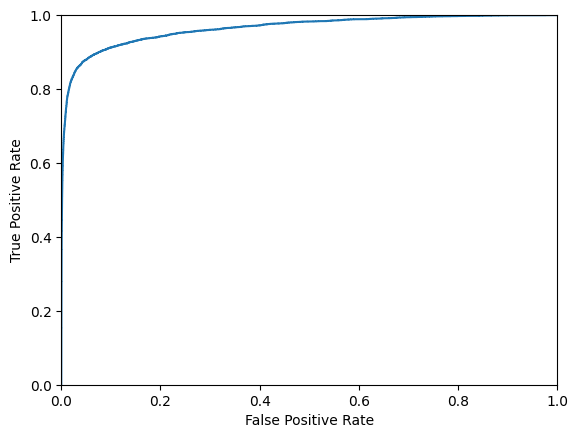

In [26]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
    
    
plot_roc_curve(fpr, tpr)
plt.show()

In [27]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_3, y_scores)


0.9645720735278116

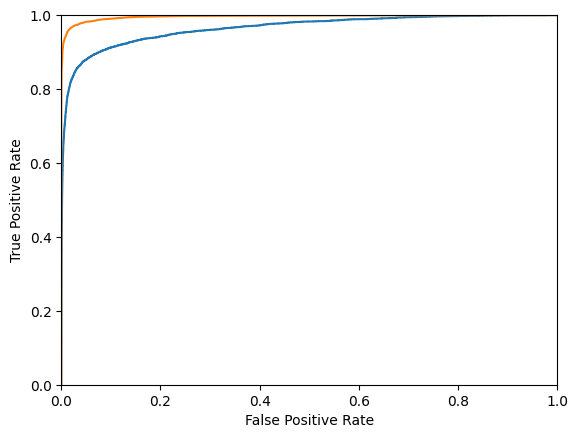

In [28]:
from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier()

y_probas_forest = cross_val_predict(forest_classifier, X_train, y_train_3, cv = 3, method = "predict_proba")
y_scores_forest = y_probas_forest[ : , 1]

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_3, y_scores_forest)

plot_roc_curve(fpr, tpr)
plot_roc_curve(fpr_forest, tpr_forest)
plt.show()






In [29]:
roc_auc_score(y_train_3, y_scores_forest)

0.9959419623480594

# Multiclass Classification

In [30]:
sgd_classifier.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [31]:
sgd_classifier.predict([X[31313]])

array(['2'], dtype='<U1')

In [33]:
some_digit_scores = sgd_classifier.decision_function([X[31313]])
some_digit_scores

array([[-38991.08943273, -11127.41230174,   2054.06961799,
         -2605.05226486, -22561.3793939 , -13744.89246399,
         -3646.22933529, -38999.66981916,  -3697.27675865,
        -14285.45168457]])

In [34]:
forest_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
forest_classifier.predict([X[31313]])

array(['8'], dtype=object)

In [36]:
forest_scores = forest_classifier.predict_proba([X[31313]])
forest_scores

array([[0.  , 0.07, 0.05, 0.  , 0.  , 0.02, 0.05, 0.  , 0.81, 0.  ]])

In [38]:
cross_val_score(sgd_classifier, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.8481, 0.8687, 0.8519])

In [39]:
cross_val_score(forest_classifier, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.96305, 0.96365, 0.96765])

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))


In [41]:
cross_val_score(sgd_classifier, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

/Users/tuncer/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/tuncer/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/tuncer/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.9055 , 0.90095, 0.9078 ])

In [42]:
cross_val_score(forest_classifier, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

array([0.96375, 0.9641 , 0.96725])

In [43]:
y_train_predict = cross_val_predict(sgd_classifier, X_train_scaled, y_train, cv = 3)

conf_matrix = confusion_matrix(y_train, y_train_predict)

/Users/tuncer/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/tuncer/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/tuncer/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [44]:
conf_matrix

array([[5607,    0,   13,    8,   11,   45,   35,    6,  197,    1],
       [   1, 6419,   39,   25,    3,   49,    7,    9,  177,   13],
       [  30,   26, 5276,   89,   71,   26,   67,   41,  321,   11],
       [  30,   23,  114, 5277,    1,  219,   26,   43,  323,   75],
       [  12,   14,   43,   10, 5263,   10,   46,   22,  254,  168],
       [  28,   15,   29,  159,   50, 4547,   83,   21,  420,   69],
       [  31,   18,   50,    3,   41,   91, 5562,    6,  115,    1],
       [  18,   16,   49,   28,   48,   13,    5, 5742,  125,  221],
       [  17,   65,   43,  101,    0,  121,   32,    9, 5412,   51],
       [  27,   21,   29,   66,  133,   44,    1,  169,  279, 5180]])

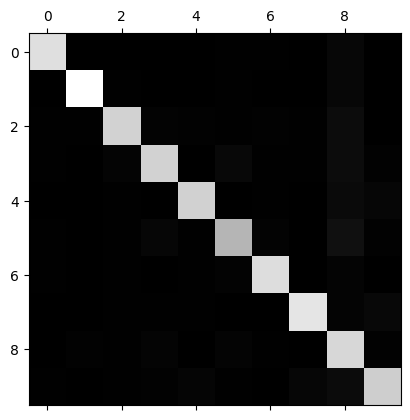

In [45]:
plt.matshow(conf_matrix, cmap = plt.cm.gray)
# Main diagonal means that digits are classified correctly

In [47]:
y_train_predict_forest = cross_val_predict(forest_classifier, X_train, y_train, cv = 3)
conf_matrix_forest = confusion_matrix(y_train, y_train_predict_forest)

In [48]:
conf_matrix_forest

array([[5844,    1,    8,    2,    4,    8,   18,    1,   34,    3],
       [   0, 6635,   37,   18,   13,    6,    3,   14,   10,    6],
       [  30,   10, 5756,   30,   29,    3,   12,   37,   42,    9],
       [   9,   10,   86, 5810,    3,   67,    9,   43,   64,   30],
       [   8,   12,   10,    2, 5664,    0,   28,   13,   10,   95],
       [  22,   10,   11,   70,    8, 5188,   47,    5,   37,   23],
       [  25,   11,    4,    0,    9,   39, 5811,    0,   19,    0],
       [   4,   24,   65,    4,   32,    1,    0, 6035,   13,   87],
       [  10,   35,   33,   56,   30,   38,   28,    7, 5552,   62],
       [  22,    9,   15,   65,   74,   14,    3,   57,   48, 5642]])

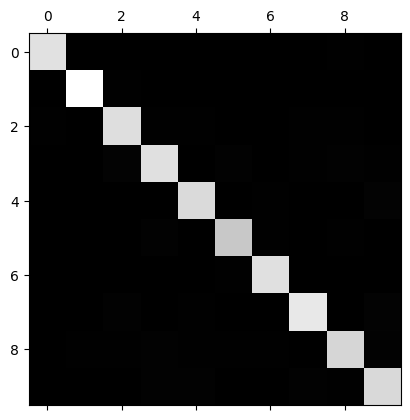

In [49]:
plt.matshow(conf_matrix_forest, cmap = plt.cm.gray)

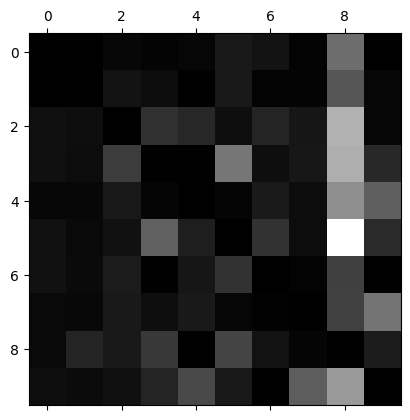

In [50]:

def plot(conf_matrix):
    row_sums = conf_matrix.sum(axis = 1, keepdims = True)
    norm_conf_matrix = conf_matrix / row_sums
    np.fill_diagonal(norm_conf_matrix, 0)
    plt.matshow(norm_conf_matrix, cmap = plt.cm.gray)
    
plot(conf_matrix)
plt.show()
    

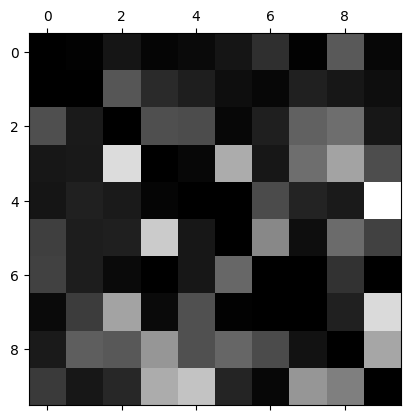

In [52]:
plot(conf_matrix_forest)
plt.show()

In [58]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train.astype(np.float64) >= 7)
y_train_odd = (y_train.astype(np.float64) % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]


knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_multilabel)

knn_classifier.predict([X[31313]])



array([[ True, False]])

In [59]:
y_train_predict_knn = cross_val_predict(knn_classifier, X_train, y_train, cv = 3)

In [60]:
f1_score(y_train, y_train_predict_knn, average = "macro")

0.9681589850287663

In [63]:
np.random.seed(42)

noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test




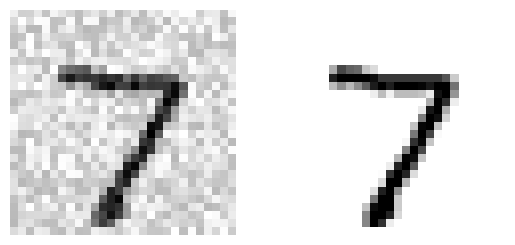

In [66]:
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
plt.show()

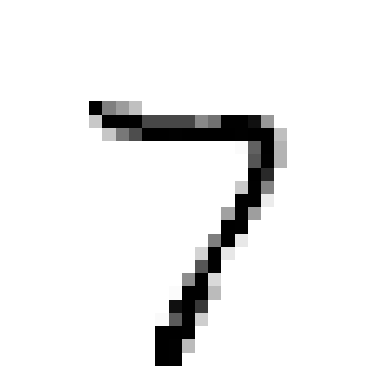

In [70]:
knn_classifier.fit(X_train_mod, y_train_mod)
clean_digit = knn_classifier.predict([X_test_mod[0]])
plot_digit(clean_digit)

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = [{"n_neighbors" : [3, 4, 5, 6], "weights" : ["uniform", "distance"]}]

grid_search = GridSearchCV(knn_classifier, param_grid, cv = 3)
grid_search.fit(X_train[:10000], y_train[:10000])





GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [83]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [85]:
final_model = grid_search.best_estimator_

final_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [86]:
grid_search.score(X_train, y_train)

1.0

In [87]:
grid_search.score(X_test, y_test)

0.9714